In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [185]:
utenti = pd.read_csv("Libera Circolazione 2017_dati al 27.10.2017.csv", sep=";", names=['PROGRESSIVO', 'CITTADINANZA_DESC','TIPO_CITTADINANZA_DESC','FACOLTA_DESC','CDS_DESC','TIPO_CORSO_DESC','TipoAbbonamento','COMUNE_RESIDENZA_DESC','PROVINCIA_RESIDENZA_DESC','REGIONE_RESIDENZA_DESC','NAZIONE_RESIDENZA_DESC'])

utenti.head()

,PROGRESSIVO,CITTADINANZA_DESC,TIPO_CITTADINANZA_DESC,FACOLTA_DESC,CDS_DESC,TIPO_CORSO_DESC,TipoAbbonamento,COMUNE_RESIDENZA_DESC,PROVINCIA_RESIDENZA_DESC,REGIONE_RESIDENZA_DESC,NAZIONE_RESIDENZA_DESC
0,PROGRESSIVO,CITTADINANZA_DESC,TIPO_CITTADINANZA_DESC,FACOLTA_DESC,CDS_DESC,TIPO_CORSO_DES,TipoAbbomanento,COMUNE_RESIDENZA_DESC,PROVINCIA_RESIDENZA_DESC,REGIONE_RESIDENZA_DESC,NAZIONE_RESIDENZA_DESC
1,1,ITALIA,Italiana,Corsi di Dottorato,"Materiali, meccatronica e ingegneria dei sistemi",Corso di Dottorato,OpenMove,Gazzo Veronese,Verona,Veneto,ITALIA
2,2,ITALIA,Italiana,Corsi di Dottorato,"Materiali, meccatronica e ingegneria dei sistemi",Corso di Dottorato,OpenMove,Roma,Roma,Lazio,ITALIA
3,3,ITALIA,Italiana,Dipartimento di Psicologia e Scienze Cognitive,Psicologia,Corso di Laurea Magistrale,OldSmartCard,VILLE D’ANAUNIA,Trento,Trentino Alto Adige,ITALIA
4,4,ITALIA,Italiana,Corsi di Dottorato,Scienze Biomolecolari,Corso di Dottorato,NewSmartCard,Trento,Trento,Trentino Alto Adige,ITALIA


In [186]:
utenti = utenti.loc[1:,['PROGRESSIVO','FACOLTA_DESC','CDS_DESC','TIPO_CORSO_DESC']]
utenti.head()


,PROGRESSIVO,FACOLTA_DESC,CDS_DESC,TIPO_CORSO_DESC
1,1,Corsi di Dottorato,"Materiali, meccatronica e ingegneria dei sistemi",Corso di Dottorato
2,2,Corsi di Dottorato,"Materiali, meccatronica e ingegneria dei sistemi",Corso di Dottorato
3,3,Dipartimento di Psicologia e Scienze Cognitive,Psicologia,Corso di Laurea Magistrale
4,4,Corsi di Dottorato,Scienze Biomolecolari,Corso di Dottorato
5,5,Dipartimento di Ingegneria Industriale,Materials and production Engineering - Ingegne...,Corso di Laurea Magistrale


In [187]:
dipartimenti = utenti.groupby(['FACOLTA_DESC'])['PROGRESSIVO'].nunique().sort_values(ascending=False)
dipartimenti


FACOLTA_DESC
Dipartimento di Lettere e Filosofia                          1144
Dipartimento di Economia e Management                        1137
Dipartimento di Ingegneria Civile, Ambientale e Meccanica    1024
Facoltà di Giurisprudenza                                    1016
Dipartimento di Ingegneria e Scienza dell'Informazione        951
Dipartimento di Sociologia e Ricerca Sociale                  705
Dipartimento di Ingegneria Industriale                        646
Dipartimento di Psicologia e Scienze Cognitive                612
Dipartimento di Matematica                                    319
Dipartimento di Fisica                                        312
Centro Interdipartimentale Biologia Integrata- CIBio          295
Centro Agricoltura, Alimenti, Ambiente - C3A                   96
Centro interdipartimentale Mente/Cervello- CIMeC               48
Scuola di studi Internazionali                                 36
Corsi di Dottorato                                             

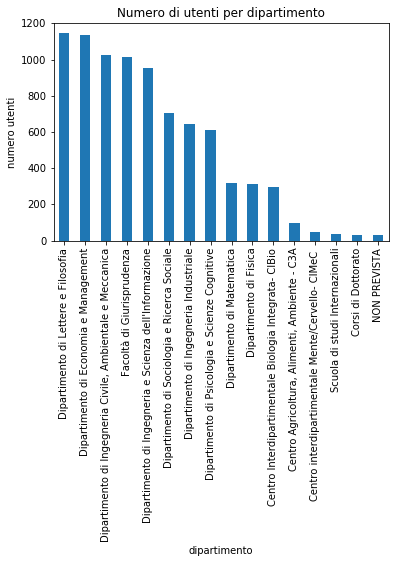

In [188]:
%matplotlib inline
dipartimenti.plot(kind='bar', title="Numero di utenti per dipartimento")
plt.ylabel('numero utenti')
plt.xlabel('dipartimento')


In [189]:
povo = [4,6,8,9,10]
mesiano = [2]
citta = [0,1,3,5,13]
san_michele = [11]
rovereto = [8,12]

sedi = [povo, mesiano, citta, san_michele, rovereto]
utenti_per_sede = []

In [192]:
for sede in sedi:
    totale_utenti_per_sede = 0
    for utenti_per_dipartimento_sede in dipartimenti.values[sede]:
        totale_utenti_per_sede += utenti_per_dipartimento_sede
    utenti_per_sede.append(totale_utenti_per_sede)
    
utenti_per_sede = sorted(utenti_per_sede, reverse=True)


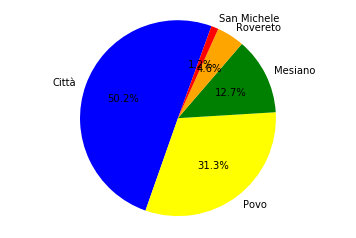

In [193]:
import matplotlib.pyplot as plt

labels= ['Città', 'Povo', 'Mesiano', 'Rovereto', 'San Michele']
colors=['blue', 'yellow', 'green', 'orange', 'red']
utenti_per_sede = [4038, 2523, 1024, 367, 96]


plt.pie(utenti_per_sede,labels=labels, colors=colors, startangle=70, autopct='%0.1f%%')

plt.axis('equal')

plt.show()